#Regression: Predicting Volatility – Using historical data to forecast future volatility.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [67]:
# Import data from csv file
df = pd.read_csv('/Users/jeanstibel/Documents/AI Classes/Projects/project_02/Resources/df_top_10.csv')
df.head()

,date,crypto_id,open,close,high,low,volume,number_of_trades,diff_oc,return,volatility,vol_change,ma_5,ma_10,price_movement
0,2020-09-22,AVAX,0.8500,5.3193,7.0000,0.8500,31441883.16,375884,4.4693,525.800000,723.529412,0.000000,0.00000,0.0,1
1,2020-09-23,AVAX,5.3279,3.5350,5.3600,3.4000,12620608.01,168336,-1.7929,-33.651157,36.787477,-59.860521,0.00000,0.0,0
2,2020-09-24,AVAX,3.5305,4.6411,4.8873,3.4033,7107843.86,104806,1.1106,31.457301,42.033706,-43.680654,0.00000,0.0,1
3,2020-09-25,AVAX,4.6366,4.7134,5.0234,4.2001,3886096.71,78381,0.0768,1.656386,17.756546,-45.326645,0.00000,0.0,1
4,2020-09-26,AVAX,4.7164,4.5200,4.8200,4.3294,1814932.97,34016,-0.1964,-4.164193,10.402002,-53.296763,4.54576,0.0,0


In [68]:
# check for nan values
df.isna().sum()

date                0
crypto_id           0
open                0
close               0
high                0
low                 0
volume              0
number_of_trades    0
diff_oc             0
return              0
volatility          0
vol_change          0
ma_5                0
ma_10               0
price_movement      0
dtype: int64

In [69]:
# Define the features
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10'] #  'diff_oc','vol_change',  'number_of_trades'
features_df = df[features].copy()

# Define target and features
target = 'volatility'

# Split the data into features (X) and target (y)
X = features_df[features]
y = features_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01)
}

In [71]:
# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        'Mean Squared Error': mse,
        'R-squared Score': r2
    }

results_df = pd.DataFrame(results).T
results_df

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.1506e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,Mean Squared Error,R-squared Score
Linear Regression,1.401356e+00,0.999639
Ridge Regression,6.766137e-12,1.000000
Lasso Regression,4.701691e-07,1.000000


In [72]:
# MOde 2

# Initialize and train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for both training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


# Print the results
print("Training Mean Squared Error (MSE):", mse_train)
print("Training R-squared (R2):", r2_train)
print("Testing Mean Squared Error (MSE):", mse_test)
print("Testing R-squared (R2):", r2_test)


Training Mean Squared Error (MSE): 3.4288401204132936e-27
Training R-squared (R2): 1.0
Testing Mean Squared Error (MSE): 1.3494891954093167e-26
Testing R-squared (R2): 1.0


In [73]:
# function for the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [74]:
# Calculate the adjusted r-squared value of the model
adj_score1 = r2_adj(X_test_scaled, y_test, model)

print(f"All Features Adjusted R2: {adj_score1}")


All Features Adjusted R2: 1.0


In [75]:
# Examine linear regression on the better training data using cross validation
from sklearn.model_selection import cross_val_score

# Combine X_train and X_test to create X_full_train
X_full_train = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
y_full_train = np.concatenate((y_train, y_test), axis=0)

cv_scores = cross_val_score(LinearRegression(), X_full_train, y_full_train, scoring="r2")
print(f"All scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")


All scores: [1. 1. 1. 1. 1.]
Mean score: 1.0
Standard Deviation: 0.0


## Using PCA

In [76]:
# create a copy of the dataframe
df_pca = df.copy()

In [77]:
# Use LabelEnconder on crypto_id
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

le = LabelEncoder()
df_pca['crypto_id'] = le.fit_transform(df_pca['crypto_id'])

# Drop column date
df_pca = df_pca.drop(columns=['date'])

# Define the features
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10'] 
features_df = df_pca[features].copy()

# Define target and features
target = 'volatility'

# Split the data into features (X) and target (y)
X = features_df[features]
y = features_df[target]

# Standardize the data before applying PCA
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca.drop(columns=['price_movement']))

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization
df_pca_transformed = pca.fit_transform(df_pca_scaled)

# Create a DataFrame to visualize the principal components
pca_df = pd.DataFrame(data=df_pca_transformed, columns=['PC1', 'PC2'])
pca_df['price_movement'] = df_pca['price_movement'].values

# Display the explained variance ratio to understand how much information is retained
explained_variance


array([0.49199782, 0.13549369])

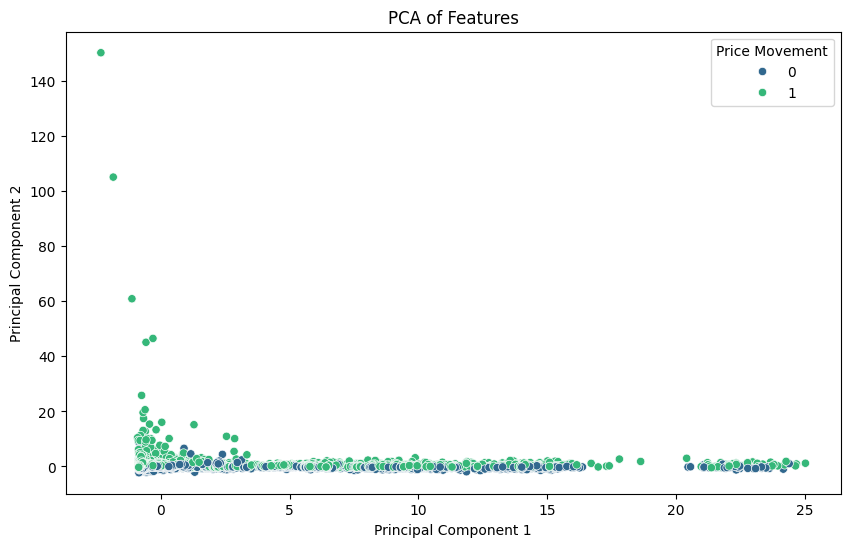

In [78]:
# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='price_movement', palette='viridis')
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Price Movement')
plt.show()


In [79]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for both training and testing sets using PCA data
mse_train_pca = mean_squared_error(y_train, y_train_pred)
mse_test_pca = mean_squared_error(y_test, y_test_pred)

r2_train_pca = r2_score(y_train, y_train_pred)
r2_test_pca = r2_score(y_test, y_test_pred)

# Print the results
print("Training Mean Squared Error (MSE) with PCA:", mse_train_pca)
print("Training R-squared (R2) with PCA:", r2_train_pca)
print("Testing Mean Squared Error (MSE) with PCA:", mse_test_pca)
print("Testing R-squared (R2) with PCA:", r2_test_pca)

Training Mean Squared Error (MSE) with PCA: 3.4288401204132936e-27
Training R-squared (R2) with PCA: 1.0
Testing Mean Squared Error (MSE) with PCA: 1.3494891954093167e-26
Testing R-squared (R2) with PCA: 1.0


In [80]:
# Examine linear regression on the better training data using cross validation
from sklearn.model_selection import cross_val_score

# Combine X_train and X_test to create X_full_train
X_full_train_pca = np.concatenate((pca_df[['PC1', 'PC2']].values[:len(X_train)], pca_df[['PC1', 'PC2']].values[len(X_train):]), axis=0)
y_full_train = np.concatenate((y_train, y_test), axis=0)

cv_scores_pca = cross_val_score(LinearRegression(), X_full_train_pca, y_full_train, scoring="r2")
print(f"All scores: {cv_scores_pca}")
print(f"Mean score: {cv_scores_pca.mean()}")
print(f"Standard Deviation: {cv_scores_pca.std()}")

All scores: [-1.58634294e-03 -3.12756462e-04 -1.47325885e-03 -4.58121941e-03
 -1.79456429e-05]
Mean score: -0.0015943046607045375
Standard Deviation: 0.0016163940579586543


## MinMaxScaler

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to the features
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)



In [82]:
# Apply MinMaxScaler to the entire dataset
df_scaled_mms = df.copy()
scaler = MinMaxScaler()
df_scaled_mms[features] = scaler.fit_transform(df[features])

# Display the first few rows of the scaled dataset
df_scaled_mms.head()

,date,crypto_id,open,close,high,low,volume,number_of_trades,diff_oc,return,volatility,vol_change,ma_5,ma_10,price_movement
0,2020-09-22,AVAX,0.8500,5.3193,7.0000,0.8500,1.277574e-07,375884,0.459837,0.523101,0.147600,0.000000,0.000000,0.0,1
1,2020-09-23,AVAX,5.3279,3.5350,5.3600,3.4000,5.128061e-08,168336,0.459428,0.017889,0.007439,-59.860521,0.000000,0.0,0
2,2020-09-24,AVAX,3.5305,4.6411,4.8873,3.4033,2.888050e-08,104806,0.459617,0.076685,0.008510,-43.680654,0.000000,0.0,1
3,2020-09-25,AVAX,4.6366,4.7134,5.0234,4.2001,1.578952e-08,78381,0.459550,0.049774,0.003555,-45.326645,0.000000,0.0,1
4,2020-09-26,AVAX,4.7164,4.5200,4.8200,4.3294,7.373723e-09,34016,0.459532,0.044518,0.002054,-53.296763,0.000043,0.0,0


In [83]:
# Define the features and target
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10']
target = 'volatility'

# Split the data into features (X) and target (y)
X = df_scaled_mms[features]
y = df_scaled_mms[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        'Mean Squared Error': mse,
        'R-squared Score': r2
    }

results_df = pd.DataFrame(results).T
results_df



,Mean Squared Error,R-squared Score
Linear Regression,2.914516e-33,1.000000
Ridge Regression,3.061514e-05,0.810456
Lasso Regression,1.615238e-04,-0.000022
